In [1]:
%matplotlib inline

from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt

from turtleEngine import BacktestingEngine

In [2]:
engine = BacktestingEngine()
engine.setPeriod(datetime(2014, 1, 1), datetime(2018, 12, 30))
engine.initPortfolio('test.csv', 10000000)

16:07:40.112000:	投资组合的合约代码['000300', '000905']
16:07:40.112000:	投资组合的初始价值10000000


In [3]:
engine.loadData()
engine.runBacktesting()
engine.calculateResult()

16:07:40.182000:	000300数据加载完成，总数据量：1185
16:07:40.221000:	000905数据加载完成，总数据量：1185
16:07:40.221000:	全部数据加载完成
16:07:40.221000:	开始回放K线数据
16:07:40.355000:	K线数据回放结束
16:07:40.355000:	开始统计回测结果
16:07:40.362000:	回测结果统计结束


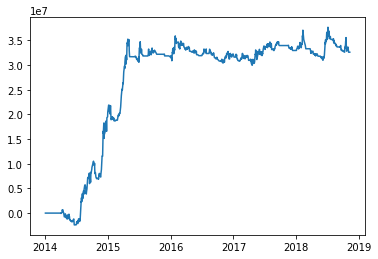

In [4]:
# 汇总每日盈亏，绘制简单资金曲线
l = [result.totalPnl for result in engine.resultList]
dateList = [result.date for result in engine.resultList]
equity = np.cumsum(l)
plt.plot(dateList, equity)

In [ ]:
# 查看逐笔的交易记录
for dt, l in engine.tradeDict.items():
    for trade in l:
        print dt, trade.vtSymbol, trade.direction, trade.offset, trade.price, trade.volume